In [1]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import norm

In [2]:
j = complex(0,1)

In [16]:
func = lambda x, y: norm.pdf(x, 0, 1)* norm.pdf(y, 0, 1)
x0 = -10
dx = 0.05
x=np.arange(x0,-x0,dx)
y0 = -10
dy = 0.05
y=np.arange(y0,-y0,dy)

In [17]:
X, Y = np.meshgrid(x,y)
nonfour = func(X,Y)

In [18]:
def get_fourier_2d(X, Y, IMAGE):

#Compute Fourier transform by numpy's FFT function
    g=np.fft.fft2(IMAGE)
#frequency normalization factor is 2*np.pi/dx
    dx = X[0][1]-X[0][0]
    dy = Y[1][0]-Y[0][0]
    wx = np.fft.fftfreq(X[0].size)*2*np.pi/dx
    wy = np.fft.fftfreq(Y[0].size)*2*np.pi/dy
    
    Wx, Wy = np.meshgrid(wx, wy)


#In order to get a discretisation of the continuous Fourier transform
#we need to multiply g by a phase factor
    g*=dx*np.exp(-j*Wx*x0)*dy*np.exp(-j*Wy*y0)/(2*np.pi)
    
    return Wx, Wy, g


In [19]:
X, Y = np.meshgrid(x,y)
Wx, Wy, four= get_fourier_2d(X,Y,nonfour)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, nonfour, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Wx, Wy, np.abs(four) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


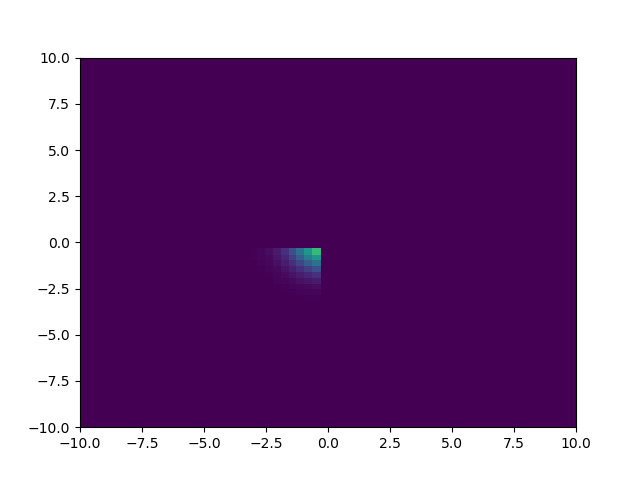

(-10, 10)

In [20]:
fig, ax = plt.subplots()
ax.pcolormesh(Wx, Wy, np.abs(four))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

<IPython.core.display.Javascript object>


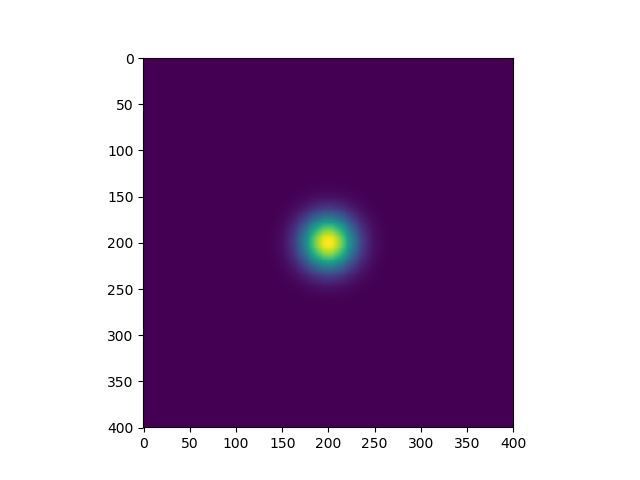

In [32]:
fig = plt.figure()
plt.imshow(nonfour)

In [44]:
wx = np.fft.fftfreq(X[0].size)*2*np.pi/dx
scale = dx/(wx[1]-wx[0])

<IPython.core.display.Javascript object>


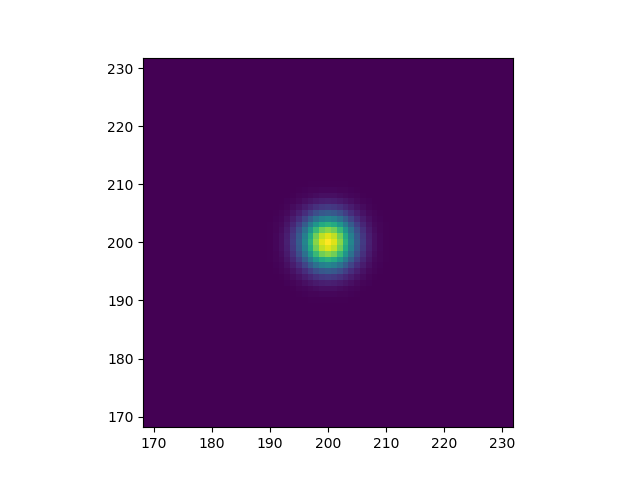

In [43]:
fig = plt.figure()
g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )
plt.imshow(np.abs(G))
plt.xlim([200-400*scale/2,200+400*scale/2])
plt.ylim([200-400*scale/2,200+400*scale/2])
plt.show()